# Name: Hrishikesh Mukund
# Exam 1: Unsupervised Learning

In [244]:
%matplotlib inline
#Imports
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import pylab 
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LogisticRegression

# a)	Refer to this link, https://archive.ics.uci.edu/ml/datasets/wine and read the description of the dataset and attach suitable headers

In [245]:
wine_df = pd.read_csv("wine-1.xls",names = ["Cultivator", "Alchohol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])

In [246]:
wine_df.head()

Cultivator  Alchohol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0           1     14.23        1.71  2.43               15.6        127   
1           1     13.20        1.78  2.14               11.2        100   
2           1     13.16        2.36  2.67               18.6        101   
3           1     14.37        1.95  2.50               16.8        113   
4           1     13.24        2.59  2.87               21.0        118   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2             5.68  1.03   3.17     1185  
3             7.80  0.86   3.45     1480  
4             4.32  1.04   2.93      735

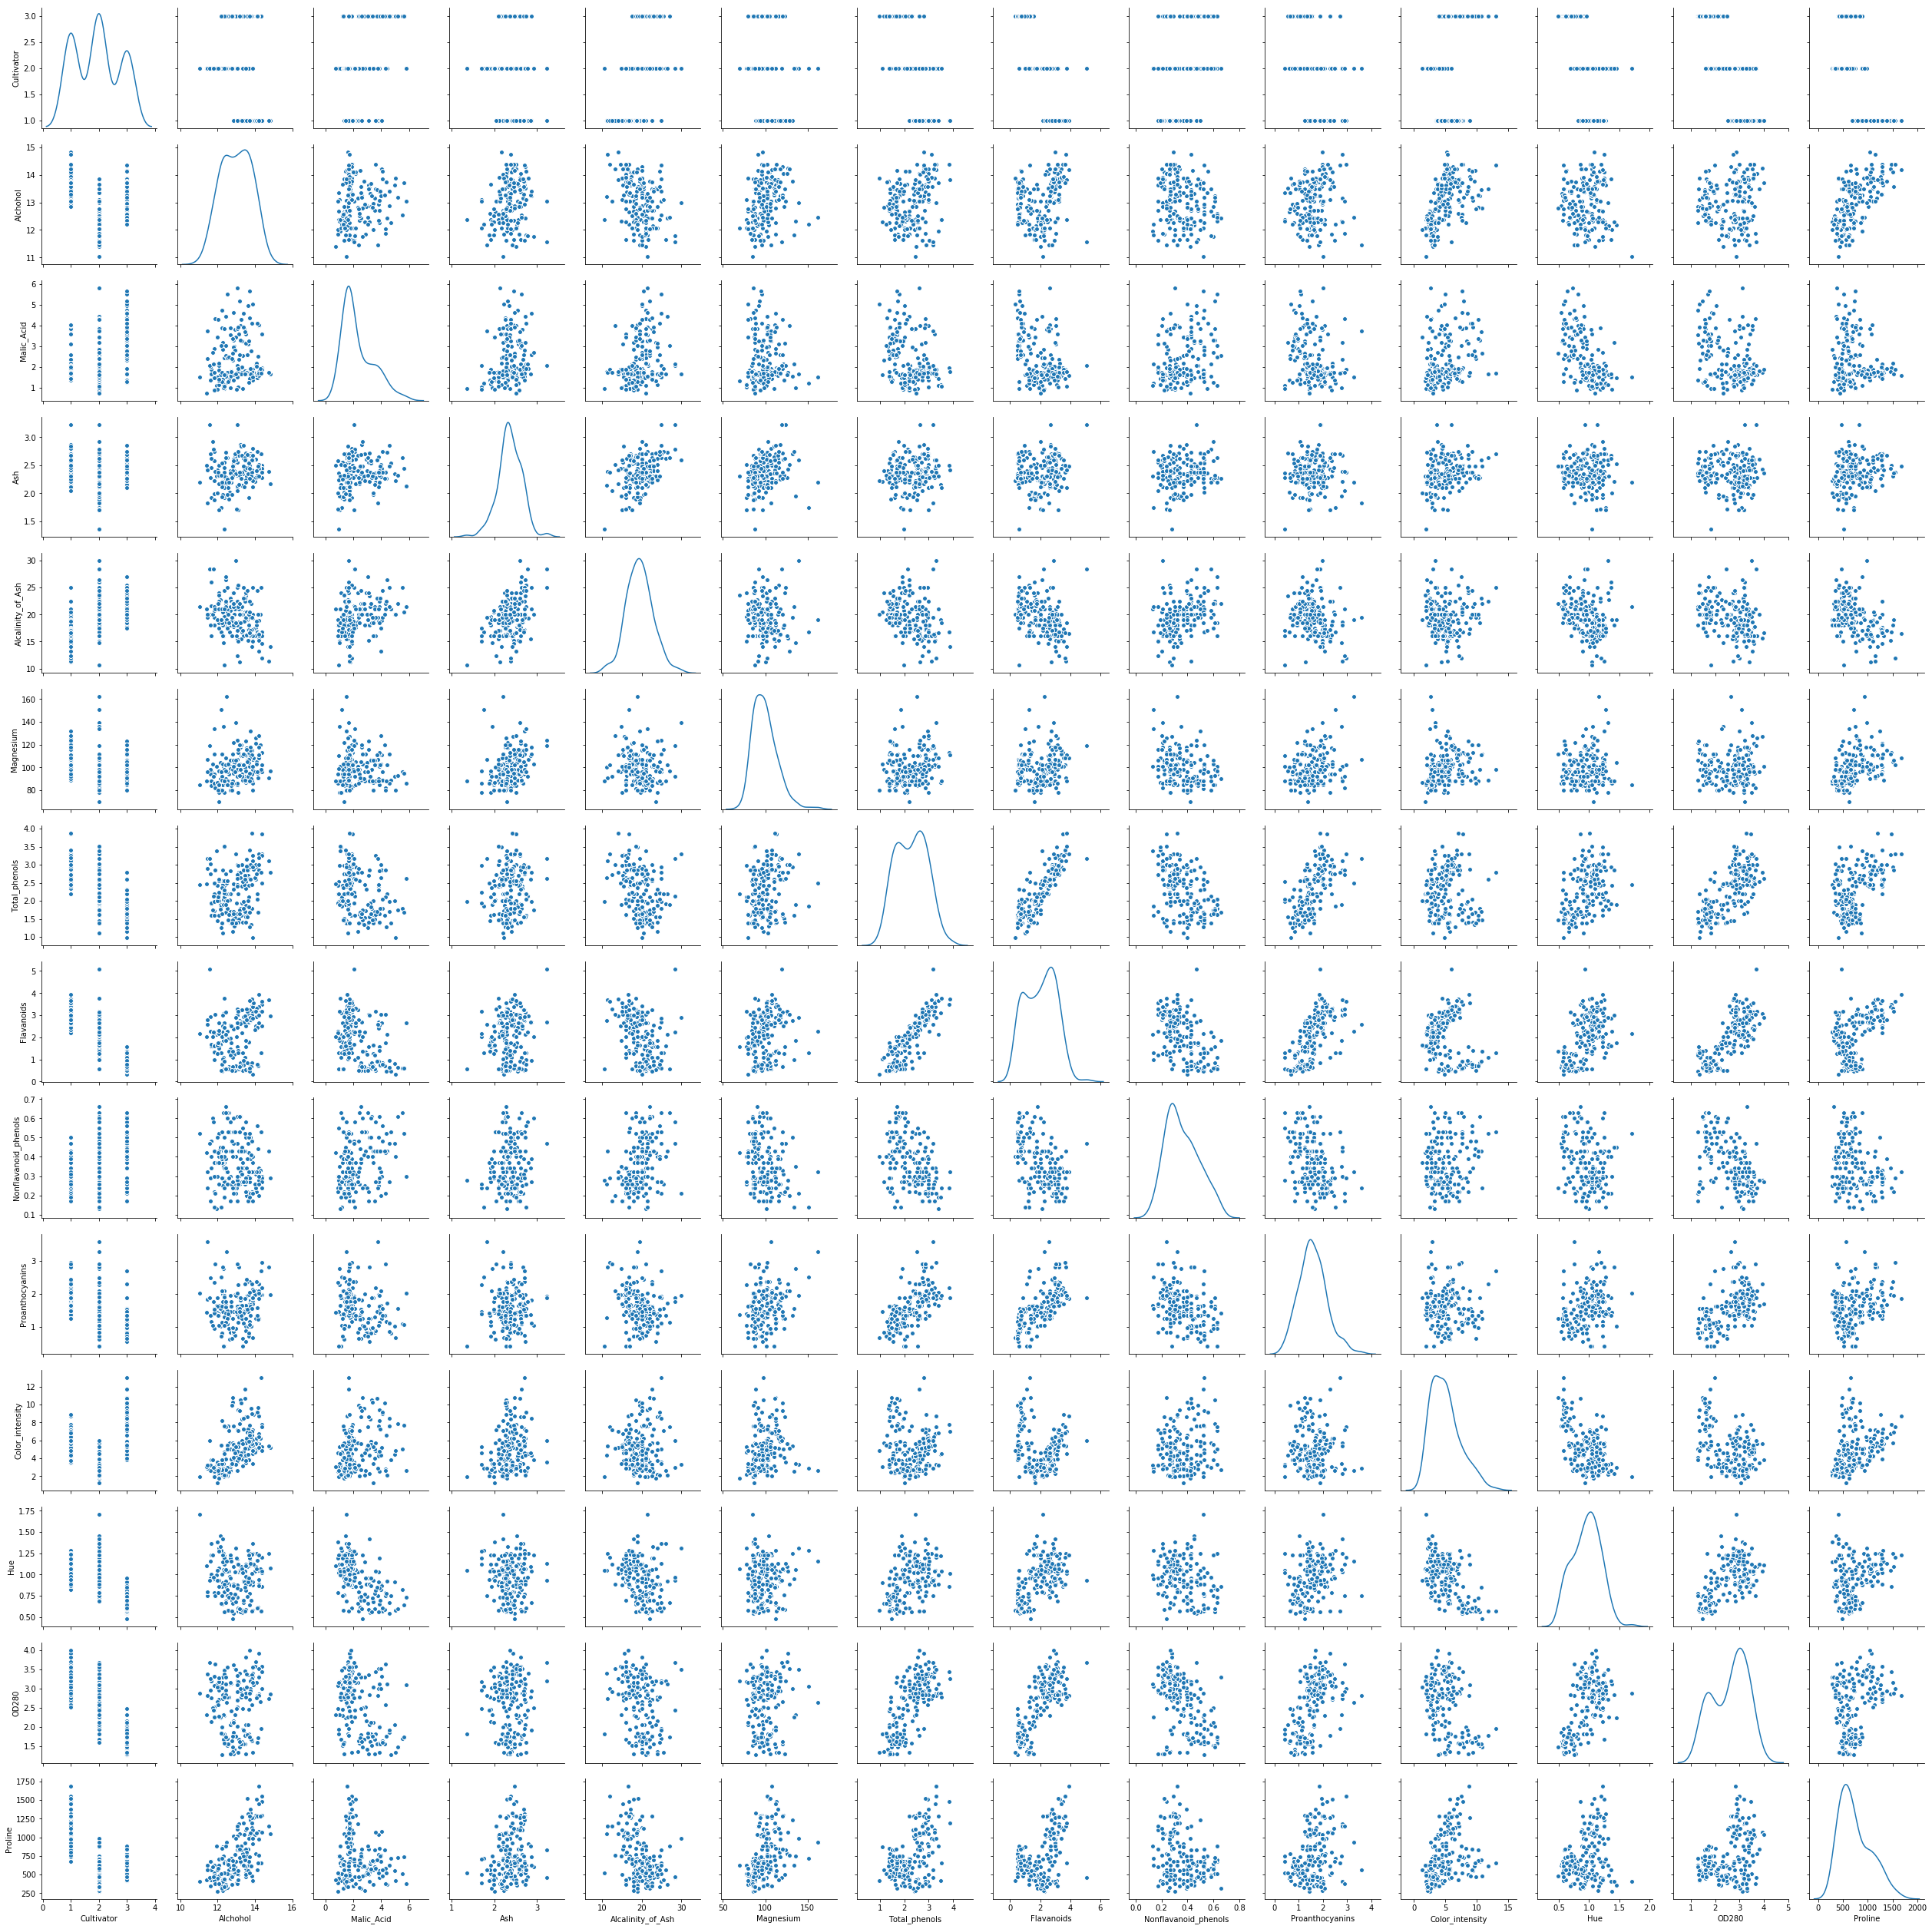

In [247]:
sns.pairplot(wine_df,diag_kind='kde')

# b)	Remove the first column (cultivator) and perform KMeans with (K=3) and show the 3D cluster plot with the most appropriate attributes in X,Y and Z –axis. 

In [248]:
X=wine_df.drop('Cultivator',axis=1)
y=wine_df['Cultivator']

In [249]:
X_std=X.apply(zscore)

In [250]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=1)
kmeans.fit(X_std)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=15, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [251]:
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(X_std) )
centroid_df

Alchohol  Malic_Acid       Ash  Alcalinity_of_Ash  Magnesium  \
0 -0.926072   -0.394042 -0.494517           0.170602  -0.491712   
1  0.164907    0.871547  0.186898           0.524367  -0.075473   
2  0.835232   -0.303810  0.364706          -0.610191   0.577587   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0      -0.075983    0.020813             -0.033534         0.058266   
1      -0.979330   -1.215248              0.726064        -0.779706   
2       0.885237    0.977820             -0.562090         0.580287   

   Color_intensity       Hue     OD280   Proline  
0        -0.901914  0.461804  0.270764 -0.753846  
1         0.941539 -1.164789 -1.292412 -0.407088  
2         0.171063  0.473984  0.779247  1.125185

Alchohol, Falvanoids, Color_Intensity

In [252]:
labels_kmeans = kmeans.labels_
pd.DataFrame(labels_kmeans)[0].value_counts()

0    65
2    62
1    51
Name: 0, dtype: int64

Text(0.5,0.92,'3D plot of KMeans Clustering')

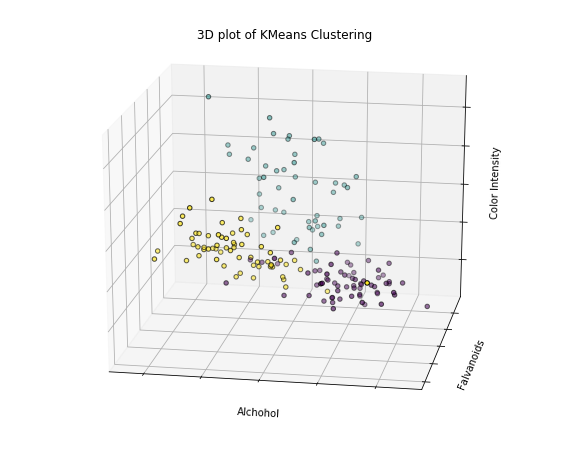

In [253]:
#Plot the 3D graph
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
ax.scatter(X_std.iloc[:, 0], X_std.iloc[:, 6], X_std.iloc[:, 9],c=labels_kmeans.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Alchohol')
ax.set_ylabel('Falvanoids')
ax.set_zlabel('Color Intensity')
ax.set_title('3D plot of KMeans Clustering')

# c)	Remove the first column (cultivator) and perform  Hierarchical Clustering (K=3) with the best linkage method and show the 3D cluster plot with the most appropriate attributes in X,Y and Z –axis. 

In [254]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
# cophenet index is a measure of the correlation between the distance of points in feature space and distance on dendrogram
# closer it is to 1, the better is the clustering

In [255]:
Z = linkage(X_std, 'average')
c, coph_dists = cophenet(Z , pdist(X_std))
c

0.7590840545998375

In [256]:
Z = linkage(X_std, 'ward')
c, coph_dists = cophenet(Z , pdist(X_std))
c

0.6623487206613261

In [257]:
Z = linkage(X_std, 'complete')
c, coph_dists = cophenet(Z , pdist(X_std))
c

0.5916829459078577

In [258]:
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
agg_cluster.fit(X_std)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=3,
            pooling_func=<function mean at 0x000002D31D700048>)

In [259]:
labels_agg = agg_cluster.labels_

In [260]:
pd.DataFrame(labels_agg)[0].value_counts()

0    174
2      3
1      1
Name: 0, dtype: int64

Even though we get a high value of cophenet for linkage using average, we see the agglomerative clustering is not done uniformly, hence let us use ward to check.

In [261]:
agg_cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
agg_cluster.fit(X_std)
labels_agg = agg_cluster.labels_
pd.DataFrame(labels_agg)[0].value_counts()

2    64
0    58
1    56
Name: 0, dtype: int64

In [262]:
X_std['labels'] = labels_agg
X_std.head()

Alchohol  Malic_Acid       Ash  Alcalinity_of_Ash  Magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   Color_intensity       Hue     OD280   Proline  labels  
0         0.251717  0.362177  1.847920  1.013009       2  
1        -0.293321  0.406051  1.113449  0.965242       2  
2         0.269020  0.318304  0.788587  1.395148       2  
3         1.186068 -0.427544  1.184071  2.334574       2  
4        -0.319276  0.362177  0.449601 -0.037874       2

In [263]:
X_std.groupby(['labels'], axis = 0).mean()

Alchohol  Malic_Acid       Ash  Alcalinity_of_Ash  Magnesium  \
labels                                                                 
0      -0.984077   -0.356716 -0.553216           0.214306  -0.504823   
1       0.075338    0.745293  0.169390           0.453018   0.008115   
2       0.825899   -0.328857  0.353136          -0.590606   0.450396   

        Total_phenols  Flavanoids  Nonflavanoid_phenols  Proanthocyanins  \
labels                                                                     
0           -0.051565    0.059067             -0.052449         0.167592   
1           -0.962723   -1.186099              0.705947        -0.808785   
2            0.889114    0.984307             -0.570172         0.555807   

        Color_intensity       Hue     OD280   Proline  
labels                                                 
0             -0.935539  0.449924  0.353896 -0.781673  
1              0.775204 -1.037384 -1.249114 -0.388339  
2              0.169529  0.499967  0.772256  1.048188

By using mean values, we can check the clear cluster sepeartion. the variables are: 
    
Alchohol, falvanoids and color intensity

Text(0.5,0.92,'3D plot of Agglomerative Clustering')

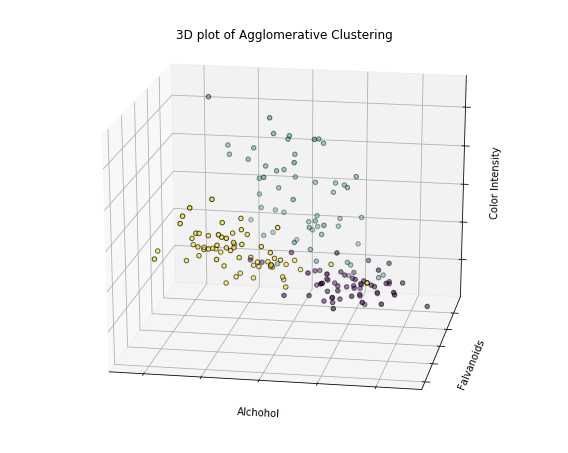

In [264]:
#Plot the 3d graph
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
ax.scatter(X_std.iloc[:, 0], X_std.iloc[:, 6], X_std.iloc[:, 9],c=labels_agg.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Alchohol')
ax.set_ylabel('Falvanoids')
ax.set_zlabel('Color Intensity')
ax.set_title('3D plot of Agglomerative Clustering')

# d)	Comment on the results obtained using KMeans and  Hierarchical Clustering, which clustering method best suited for this dataset.

KMeans clustering has divided into three clusters of size: 65, 62 and 51 and when we check the value of centroids, the most appropriate values are Alchohol, Falvanoids and Color intensity

Agglomerative Clustering has divided into three clusters of size: 64, 58 and 56 and when we check the mean values of the attributes, the most appropriate are again Alchohol, falvanoids and Color Intensity.

From the 3D plot, we can see that, few of the data points in KMeans clustering has spread accross to another cluster (few purple points near yellow points ) and those data points in Agglomerative are clustered accordingly except for 3 datapoints. Hence we can conclude that Agglomerative has a better cluster model than KMeans for the wine dataset.

In [265]:
#Drop the labels created using Agglomerative clustering for the next problem
X_std = X_std.drop('labels', axis = 1)

# e)	Apply PCA technique on the 13 independent variables and reduce the dimensions to (top-7) PC dimensions based on Eigen Values and reduce the original dataset to 178 x 7 dimension and fit a Logistic Regression model for (70%) of records and validate on (30%) of the records with precision and recall values.

In [266]:
# Find the covariance of the attributes with respect to each other
cov_matrix = np.cov(X_std, rowvar=False)
cov_matrix

array([[ 1.00564972,  0.09493026,  0.21273976, -0.31198788,  0.27232816,
         0.29073446,  0.23815287, -0.15681042,  0.13747022,  0.549451  ,
        -0.07215255,  0.07275191,  0.64735687],
       [ 0.09493026,  1.00564972,  0.16497228,  0.29013035, -0.05488343,
        -0.3370606 , -0.41332866,  0.29463237, -0.22199334,  0.25039204,
        -0.56446685, -0.37079354, -0.19309537],
       [ 0.21273976,  0.16497228,  1.00564972,  0.44587209,  0.28820583,
         0.12970824,  0.11572743,  0.1872826 ,  0.00970647,  0.2603499 ,
        -0.07508874,  0.00393333,  0.22488969],
       [-0.31198788,  0.29013035,  0.44587209,  1.00564972, -0.0838039 ,
        -0.32292752, -0.353355  ,  0.36396647, -0.19844168,  0.01883781,
        -0.27550299, -0.27833221, -0.44308618],
       [ 0.27232816, -0.05488343,  0.28820583, -0.0838039 ,  1.00564972,
         0.21561254,  0.19688989, -0.25774204,  0.23777643,  0.20107967,
         0.05571118,  0.06637684,  0.39557317],
       [ 0.29073446, -0.337060

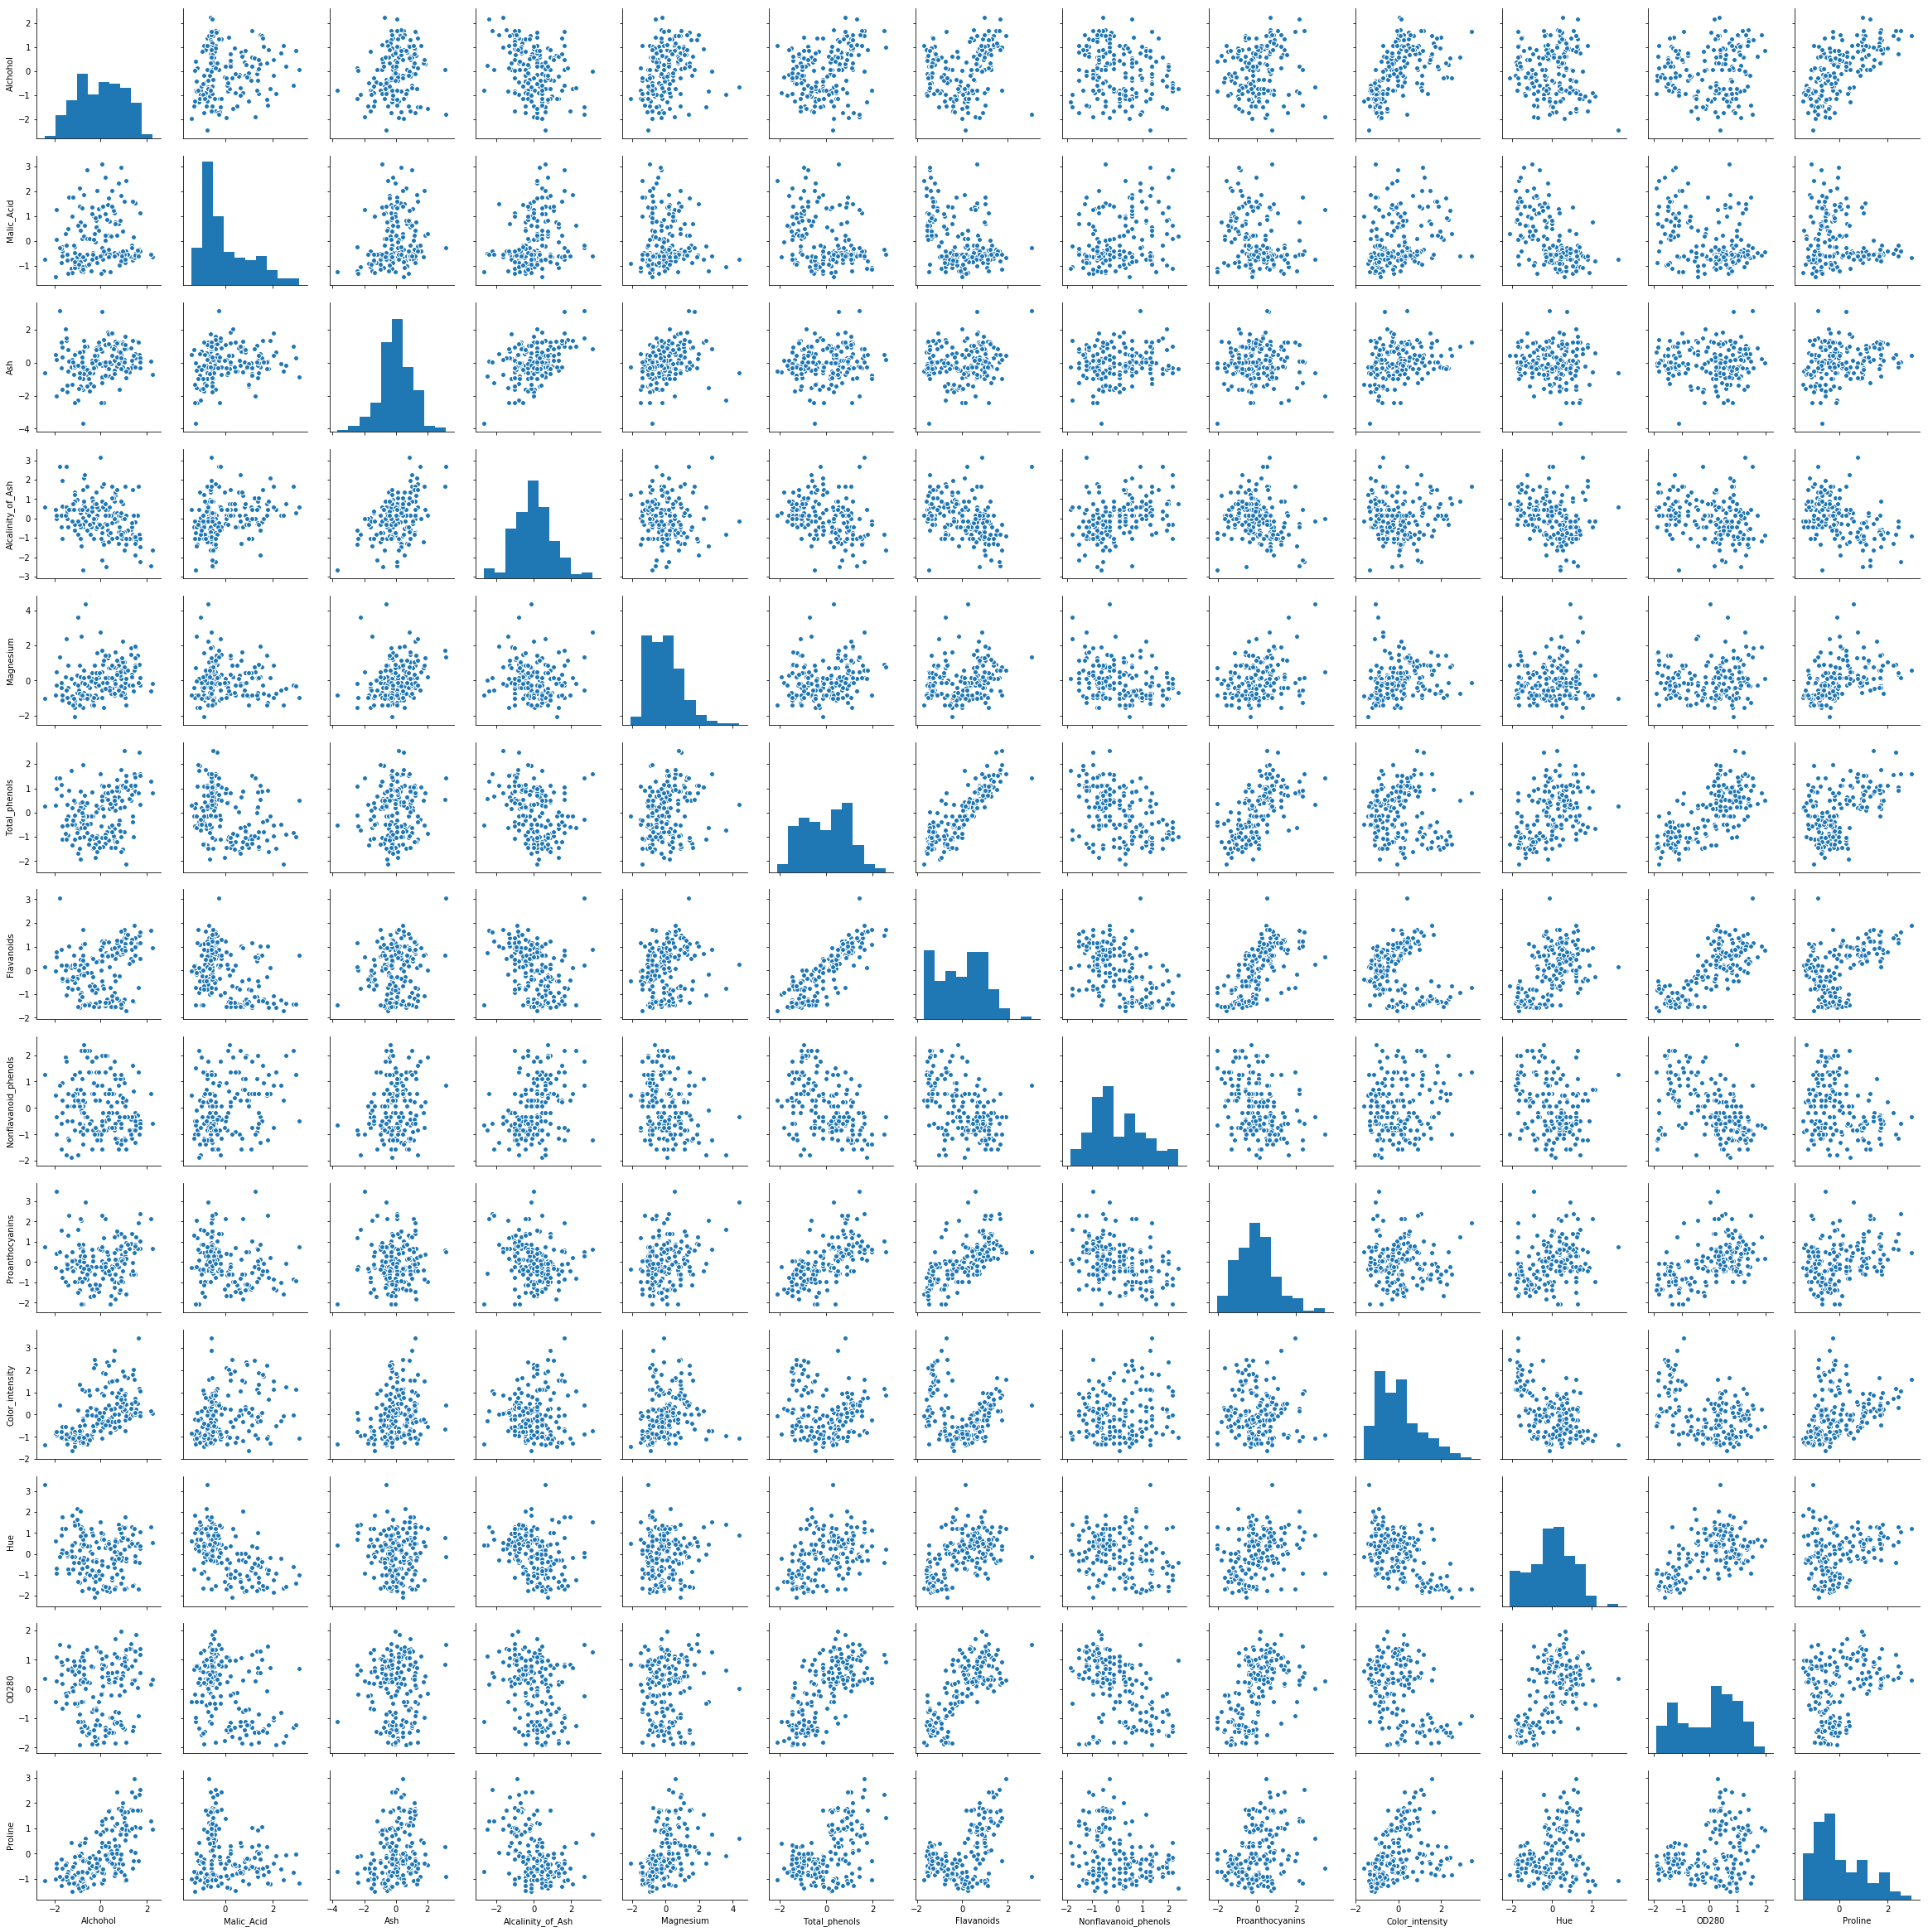

In [267]:
sns.pairplot(X_std)

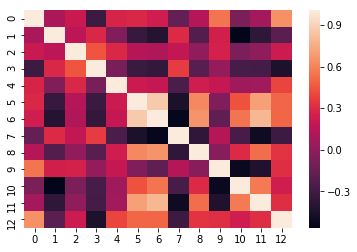

In [268]:
sns.heatmap(cov_matrix)

We can use PCA for this dataset since there is some correlation between the attributes

In [269]:
#To the covariance matrix, we apply eigen decomposition which gives us eigen vector and eigen values
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)

In [270]:
print('Eigen Vectors \n',eig_vecs)
print('\n Eigen Values \n', eig_vals)

Eigen Vectors 
 [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.05677422 -0.15636143  0.06222011 -0.27140257  0.07128891
   0.06787022]
 [-0.39466085  0.06503951 -0.14617896  0.19806835 -0.14931841 -0.0841223
   0.02792498  0.46390791 -0.40593409 -0.30388245 -0.28603452  0.30434119
  -0.32013135]
 [-0.42

In [271]:
#Combining the eigen vectors and values to form the eigen pair
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]
eig_pairs

[(4.732436977583593,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.511080929645122,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464688,
  array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
         -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
         -0.08522192, -0.16600459,  0.12674592])),
 (0.9241658668248742,
  array([-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
          0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
         -0.42777141,  0.18412074, -0.23207086])),
 (0.8580486765371106,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841, 

In [272]:
#Sorting the eigen pairs in decending order
eig_pairs.sort()
eig_pairs.reverse()

In [273]:
eig_pairs

[(4.732436977583593,
  array([-0.1443294 ,  0.24518758,  0.00205106,  0.23932041, -0.14199204,
         -0.39466085, -0.4229343 ,  0.2985331 , -0.31342949,  0.0886167 ,
         -0.29671456, -0.37616741, -0.28675223])),
 (2.511080929645122,
  array([ 0.48365155,  0.22493093,  0.31606881, -0.0105905 ,  0.299634  ,
          0.06503951, -0.00335981,  0.02877949,  0.03930172,  0.52999567,
         -0.27923515, -0.16449619,  0.36490283])),
 (1.4542418678464688,
  array([ 0.20738262, -0.08901289, -0.6262239 , -0.61208035, -0.13075693,
         -0.14617896, -0.1506819 , -0.17036816, -0.14945431,  0.13730621,
         -0.08522192, -0.16600459,  0.12674592])),
 (0.9241658668248742,
  array([-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
          0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
         -0.42777141,  0.18412074, -0.23207086])),
 (0.8580486765371106,
  array([-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
         -0.14931841, 

In [274]:
# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sort = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sort = [eig_pairs[index][1] for index in range(len(eig_vals))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sort)

Eigenvalues in descending order: 
[4.732436977583593, 2.511080929645122, 1.4542418678464688, 0.9241658668248742, 0.8580486765371106, 0.6452822124678536, 0.5541414662457844, 0.3504662749462538, 0.2905120326939766, 0.2523200103608249, 0.22706428173088491, 0.16972373898012177, 0.1039619918207529]


In [275]:
#Code to calculate cumulative variance explained
tot = sum(eig_vals)
var_exp =  [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 36.1988481   55.40633836  66.52996889  73.59899908  80.16229276
  85.09811607  89.3367954   92.01754435  94.23969775  96.16971684
  97.90655253  99.20478511 100.        ]


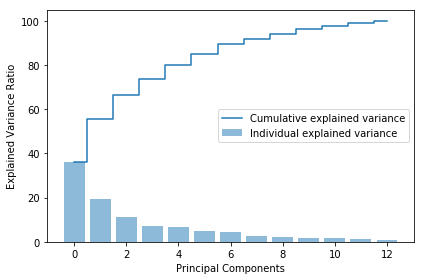

In [276]:
#Cumulative graph that explains percentage of variance for each PCs
plt.figure(figsize=(6 , 4))
plt.bar(range(13), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(13), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

By following the above steps, we get PC1 to PC7 explaining 89.3367954% variance of the data. We can reduce the dimension to 7. This is called dimensionality reduction

In [277]:
# reduce the degree to 2D by applying dort product to the scaled X data. 
P_reduce = np.array(eigvectors_sort[0:7]).transpose()
Proj_data_2D = np.dot(X_std,P_reduce)
Proj_df=pd.DataFrame(Proj_data_2D)

In [278]:
Proj_data_2D.shape

(178, 7)

In [279]:
Proj_df.head()

0         1         2         3         4         5         6
0 -3.316751  1.443463  0.165739 -0.215631  0.693043  0.223880 -0.596427
1 -2.209465 -0.333393  2.026457 -0.291358 -0.257655  0.927120 -0.053776
2 -2.516740  1.031151 -0.982819  0.724902 -0.251033 -0.549276 -0.424205
3 -3.757066  2.756372  0.176192  0.567983 -0.311842 -0.114431  0.383337
4 -1.008908  0.869831 -2.026688 -0.409766  0.298458  0.406520 -0.444074

In [280]:
Proj_df = Proj_df.rename(columns={0:'PC1',1:'PC2',2:'PC3',3:'PC4',4:'PC5',5:'PC6',6:'PC7'})

In [281]:
Proj_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7
0 -3.316751  1.443463  0.165739 -0.215631  0.693043  0.223880 -0.596427
1 -2.209465 -0.333393  2.026457 -0.291358 -0.257655  0.927120 -0.053776
2 -2.516740  1.031151 -0.982819  0.724902 -0.251033 -0.549276 -0.424205
3 -3.757066  2.756372  0.176192  0.567983 -0.311842 -0.114431  0.383337
4 -1.008908  0.869831 -2.026688 -0.409766  0.298458  0.406520 -0.444074

In [282]:
#Do train test split
X_train, X_test, y_train, y_test = train_test_split(Proj_data_2D, y, test_size=0.3, random_state=7)

In [283]:
#Do logistic regression on the 7 PCs
LogReg_model_PCA = LogisticRegression()
LogReg_model_PCA.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [284]:
y_pred = LogReg_model_PCA.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)

In [285]:
acc

0.9814814814814815

In [286]:
metrics.confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 24,  0],
       [ 0,  1, 16]], dtype=int64)

In [287]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        13
          2       0.96      1.00      0.98        24
          3       1.00      0.94      0.97        17

avg / total       0.98      0.98      0.98        54



The accuracy score for logistic regression after reducing the dimension to 7 using PCA is: 0.9814814814814815

The Precision for wine types:

Wine Type 1: 100%

Wine Type 2: 96%

Wine Type 3: 100%

The Recall for wine types:

Wine Type 1: 100%

Wine Type 2: 100%

Wine Type 3: 94%


Since we have 178 samples and we reduced the dimension to 7 ( n< p**2), we can use PCA for reducing the bias and variance error which does not lead to model overfitting

# f)	Compare the above (e) results with fitting a Logistic Regression model for the original dataset (178 x 13) without applying PCA.  [with 70% & 30% split]

In [288]:
#Do train test split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=7)

In [289]:
#Do logistic regression on original data that is scaled using zscore
LogReg_model_without_PCA = LogisticRegression()
LogReg_model_without_PCA.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [290]:
y_pred = LogReg_model_without_PCA.predict(X_test)
acc = metrics.accuracy_score(y_test,y_pred)

In [291]:
acc

0.9814814814814815

In [292]:
metrics.confusion_matrix(y_test,y_pred)

array([[13,  0,  0],
       [ 0, 23,  1],
       [ 0,  0, 17]], dtype=int64)

In [293]:
print(metrics.classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        13
          2       1.00      0.96      0.98        24
          3       0.94      1.00      0.97        17

avg / total       0.98      0.98      0.98        54



The accuracy score for logistic regression without using PCA: 0.9814814814814815

The Precision for wine types:

Wine Type 1: 100%

Wine Type 2: 100%

Wine Type 3: 94%

The Recall for wine types:

Wine Type 1: 100%

Wine Type 2: 96%

Wine Type 3: 100%

Both the models are giving the same accuracy but we can see that Precision and recall of the models differ for the wine types as mentioned above. We would prefer to use PCA model as the computational speed will reduce because we have reduced the dimensions by almost half ratehr than using all the 13 attributes from the data.

# g)	Comment on the effect of PCA with reference to Bias – Variance trade off, between the model (e) and (f)

Model with using PCA have both high precision and recall value but the precision is slightly greater than recall value in this case. We may conclude that this model has both moderate bias and variance error with bias error a little on the higher end. However, the model without using PCA has high precision and recall values but the recall is slightly greater than the pecision value which indicates variance error to be on the higher end. 